# Housing Price Prediction


## Table of Contents

- [Instructions](#Instructions)
- [About the Dataset](#About-the-Dataset)
- [Module 1: Importing Data](#Module-1:-Importing-Data-Sets)
- [Module 2: Data Wrangling](#Module-2:-Data-Wrangling)
- [Module 3: Exploratory Data Analysis](#Module-3:-Exploratory-Data-Analysis)
- [Module 4: Model Development](#Module-4:-Model-Development)
- [Module 5: Model Evaluation and Refinement](#Module-5:-Model-Evaluation-and-Refinement)

### Introduction

This notebook analyzes house sales data for King County, USA to predict housing prices. It demonstrates the process of:

1. Importing and exploring a real estate dataset
2. Performing data wrangling and preprocessing
3. Conducting exploratory data analysis to uncover insights
4. Developing predictive models for house prices
5. Evaluating and refining the models

The analysis uses features like square footage, number of bedrooms, location, and other housing attributes to determine key factors influencing home prices in the area. This information can be valuable for real estate investment decisions and understanding market trends in King County.

### About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
import warnings

# Surpress warnings:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets


Download the dataset by running the cell below.


In [3]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [5]:
file_name="housing.csv"

download(filepath, file_name)

Load the csv:


In [17]:
df = pd.read_csv(file_name)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.describe()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,0.00000,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


### Data Wrangling


In [18]:
df.drop(columns=["id", "Unnamed: 0"], inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

df.describe()

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code>

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code>

In [19]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

df["floors"].value_counts().to_frame()

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


seaborn <code>boxplot</code> to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<Axes: xlabel='waterfront', ylabel='price'>

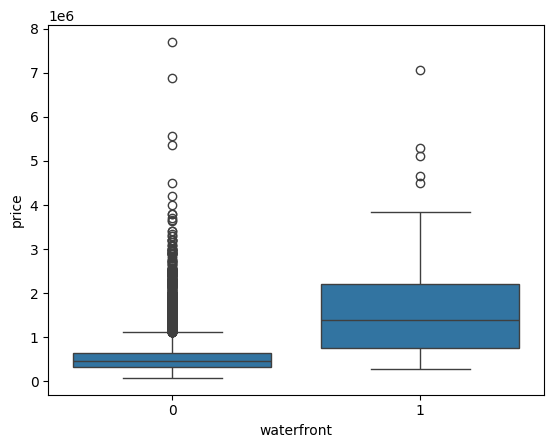

In [20]:
sns.boxplot(x='waterfront', y='price', data=df)

### Question 5

Use seaborn <code>regplot</code> to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. 


<Axes: xlabel='sqft_above', ylabel='price'>

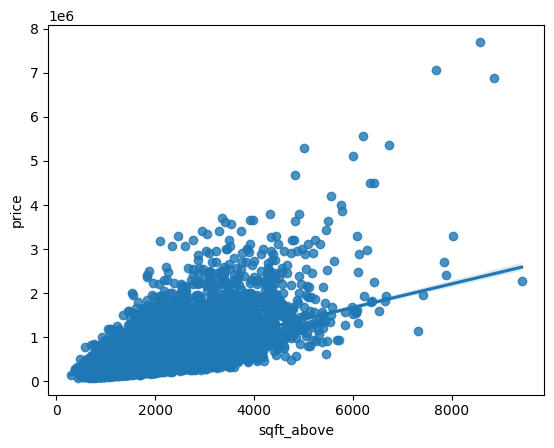

In [21]:
sns.regplot(x='sqft_above', y='price', data=df)

Use Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [22]:
df.corr()['price'].sort_values()

zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [23]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2.

In [24]:

from sklearn.metrics import r2_score

# Define the feature (X) and target (y)
X = df[['sqft_living']]
y = df['price']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target values
y_pred = model.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Output the R^2 value
print(f'R^2 Score: {r2}')

R^2 Score: 0.4928532179037931


Fit a linear regression model to predict the <code>'price'</code> using the list of features:

In [25]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [26]:
# Define the feature matrix (X) and target vector (y)
X = df[features]
y = df['price']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target values
y_pred = model.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Output the R^2 value
print(f'R^2 Score: {r2}')

R^2 Score: 0.6576380528414218


Next Steps:
1. Create a pipeline object using the 'Input' list
2. Fit the pipeline using the features in the 'features' list
3. Calculate the R^2 score for this model
4. Compare the R^2 score with the previous linear regression model
5. Analyze the impact of feature scaling and polynomial features on the model's performance

In [40]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the feature matrix (X) and target vector (y)
X = df[features]
y = df['price']

# List of tuples for the pipeline steps
pipeline_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create the pipeline object
pipeline = Pipeline(pipeline_steps)

# Fit the pipeline
pipeline.fit(X, y)

# Predict the target values
y_pred = pipeline.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Output the R^2 value
print(f'R^2 Score: {r2}')

R^2 Score: 0.7181841241386351


### Model Evaluation and Refinement


Import the necessary modules:


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

We will split the data into training and testing sets:


In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [30]:
from sklearn.linear_model import Ridge

In [31]:
# Create a Ridge regression model with a regularization parameter alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge regression model to the training data
ridge_model.fit(x_train, y_train)

# Predict the target values on the test set
y_pred = ridge_model.predict(x_test)

# Calculate the R^2 score using the test data
r2 = r2_score(y_test, y_pred)

# Output the R^2 value
print(f'R^2 Score on Test Data: {r2}')

R^2 Score on Test Data: 0.647875916393911


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [32]:
# Perform a second-order polynomial transformation on both the training and testing data
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a Ridge regression model with a regularization parameter alpha = 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge regression model to the transformed training data
ridge_model.fit(x_train_poly, y_train)

# Predict the target values on the transformed test data
y_pred = ridge_model.predict(x_test_poly)

# Calculate the R^2 score using the test data
r2 = r2_score(y_test, y_pred)

# Output the R^2 value
print(f'R^2 Score on Test Data: {r2}')

R^2 Score on Test Data: 0.7002744262240516
